In [117]:
import pandas as pd # Pandas (version : 1.1.5) 
import numpy as np # Numpy (version : 1.19.2)
import matplotlib.pyplot as plt # Matplotlib (version :  3.3.2)
from sklearn.cluster import KMeans # Scikit Learn (version : 0.23.2)
import seaborn as sns # Seaborn (version : 0.11.1)
from IPython.display import display, HTML
plt.style.use('seaborn')


In [118]:
display(HTML("<style>div.output_scroll { height: 10em; }</style>"))

<b>2. Importing the data from .csv file</b>

In [119]:
import os
os.getcwd()


'C:\\Users\\Sohan\\Downloads\\CS'

In [120]:
os.chdir("C:/Users/Sohan/Downloads/CS")

In [121]:
os.getcwd()

'C:\\Users\\Sohan\\Downloads\\CS'

<b>We Read the data using read_csv from pandas library</b>

In [122]:
customer_data = pd.read_csv('Mall_Customers.csv')

 <b>Viewing the data that we imported to pandas dataframe object</b> 

In [123]:
customer_data  

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


<b>3. Viewing and Describing the data</b>

In [124]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [80]:
customer_data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [21]:
#Checking the length or size of data using len()

len(customer_data)

200

In [22]:
#Checking the shape of the dataset using shape.

customer_data.shape

(200, 5)

In [23]:
#Displaying Column names of the dataset using columns

customer_data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

 Information about the dataset using info()

In [24]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


<b>Describing the data using describe()</b>

In [25]:
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<b>4. Checking the data for inconsistencies and further cleaning the data if needed</b>

In [26]:
# Checking summary of missing values

customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [125]:
#Deleting 'customer_id' colummn using drop().

customer_data = customer_data.drop('CustomerID', axis=1)
customer_data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [96]:
#Cleaning the Annual income and Spending Score using rename().

customer_data = customer_data.rename(columns={'Annual Income (k$)':'Annual_Income','Spending Score (1-100)':'Spending_Score'})
customer_data.head()


,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


<b>5. Understanding and Visualizing Data</b>

In [97]:
#Finding and viewing Corelations in the data and columns using corr

corr = customer_data.corr()
corr

,Age,Annual_Income,Spending_Score
Age,1.000000,-0.012398,-0.327227
Annual_Income,-0.012398,1.000000,0.009903
Spending_Score,-0.327227,0.009903,1.000000


<b>Plotting the heatmap of correlation of all the columns of the dataset.</b>

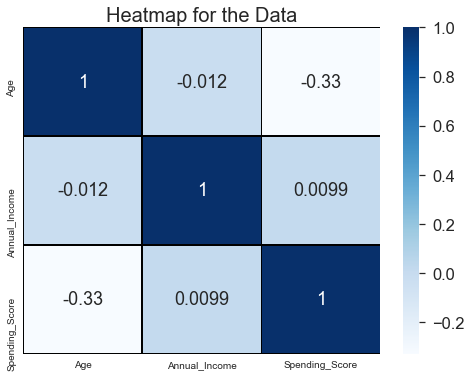

In [126]:

fig, ax = plt.subplots(figsize=(8,6))
sns.set(font_scale=1.5)
ax = sns.heatmap(corr, cmap = 'Blues', annot = True, linewidths=0.5, linecolor='black')
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()


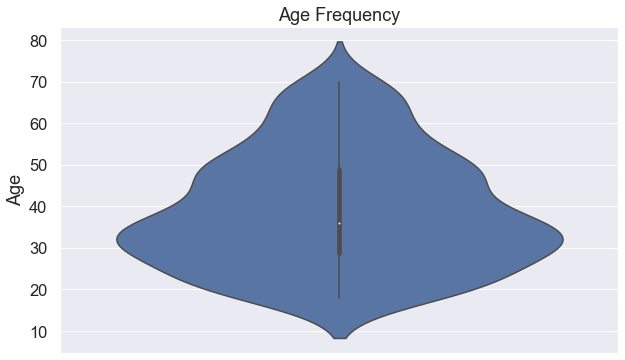

In [127]:
plt.figure(figsize=(10,6))
plt.title("Age Frequency")
sns.axes_style("dark")
sns.violinplot(y=customer_data["Age"])
plt.show()

<b>Plotting Gender Distribution on Bar graph and the ratio of distribution using Pie Chart.</b>


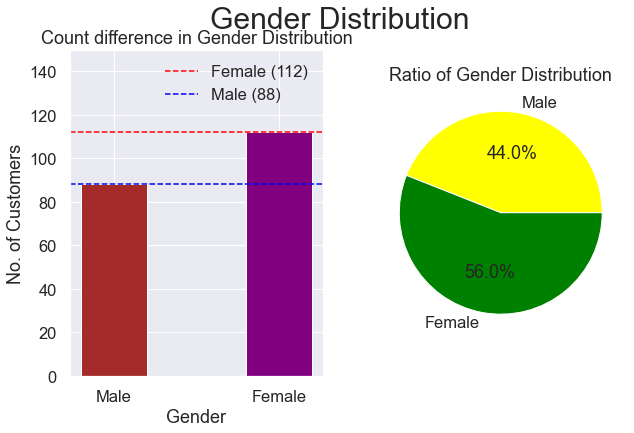

In [128]:
#Plotting Gender Distribution on Bar graph and the ratio of distribution using Pie Chart.

labels=customer_data['Gender'].unique()
values=customer_data['Gender'].value_counts(ascending=True)


fig, (ax0,ax1) = plt.subplots(ncols=2,figsize=(10,6))
bar = ax0.bar(x=labels, height=values, width=0.4, align='center', color=['brown','purple'])
ax0.set(title='Count difference in Gender Distribution',xlabel='Gender', ylabel='No. of Customers')
ax0.set_ylim(0,150)
ax0.axhline(y=customer_data['Gender'].value_counts()[0], color='red', linestyle='--', label=f'Female ({customer_data.Gender.value_counts()[0]})')
ax0.axhline(y=customer_data['Gender'].value_counts()[1], color='blue', linestyle='--', label=f'Male ({customer_data.Gender.value_counts()[1]})')
ax0.legend()

ax1.pie(values,labels=labels,colors=['yellow','green'],autopct='%1.1f%%')
ax1.set(title='Ratio of Gender Distribution')
fig.suptitle('Gender Distribution', fontsize=30);
plt.show()

<b>Visualizing Statistical Description of the Age on a boxplot</b>

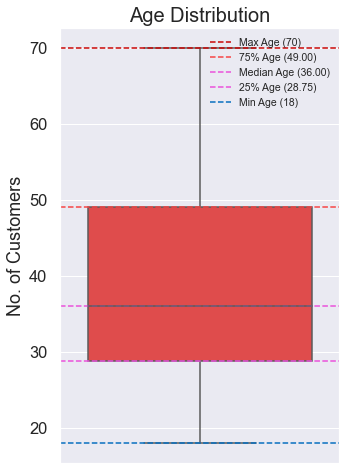

In [129]:
fig, ax = plt.subplots(figsize=(5,8))
sns.set(font_scale=1.5)
ax = sns.boxplot(y=customer_data["Age"], color="#f73434")
ax.axhline(y=customer_data['Age'].max(), linestyle='--',color='#c90404', label=f'Max Age ({customer_data.Age.max()})')
ax.axhline(y=customer_data['Age'].describe()[6], linestyle='--',color='#f74343', label=f'75% Age ({customer_data.Age.describe()[6]:.2f})')
ax.axhline(y=customer_data['Age'].median(), linestyle='--',color='#eb50db', label=f'Median Age ({customer_data.Age.median():.2f})')
ax.axhline(y=customer_data['Age'].describe()[4], linestyle='--',color='#eb50db', label=f'25% Age ({customer_data.Age.describe()[4]:.2f})')
ax.axhline(y=customer_data['Age'].min(), linestyle='--',color='#046ebf', label=f'Min Age ({customer_data.Age.min()})')
ax.legend(fontsize='xx-small', loc='upper right')
ax.set_ylabel('No. of Customers')

plt.title('Age Distribution', fontsize = 20)
plt.show()

<b>Visualising  the Number of customers and Ages </b>


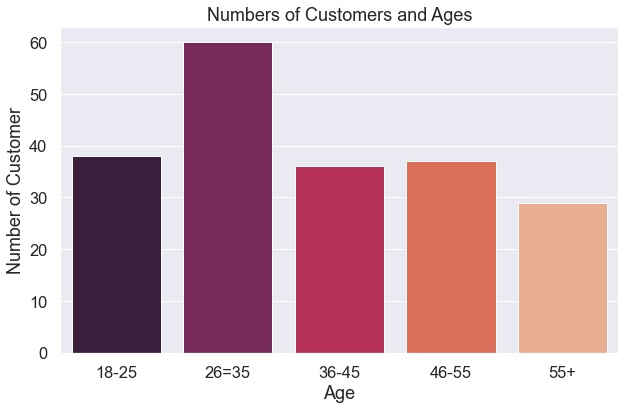

In [130]:
age18_25 = customer_data.Age[(customer_data.Age <=25) & (customer_data.Age >=18)]
age26_35 = customer_data.Age[(customer_data.Age <=35) & (customer_data.Age >=26)]
age36_45 = customer_data.Age[(customer_data.Age <=45) & (customer_data.Age >=36)]
age46_55 = customer_data.Age[(customer_data.Age <=55) & (customer_data.Age >=46)]
ageabove55 = customer_data.Age[customer_data.Age >=56]

x =["18-25","26=35","36-45","46-55","55+"]
y =[len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(ageabove55.values)]

plt.figure(figsize=(10,6))
sns.barplot(x=x,y=y,palette="rocket")
plt.title("Numbers of Customers and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show() 
#categorising the Number of customers and ages


<b>Visualising  the Number of Customer Having the Score and spending score</b>


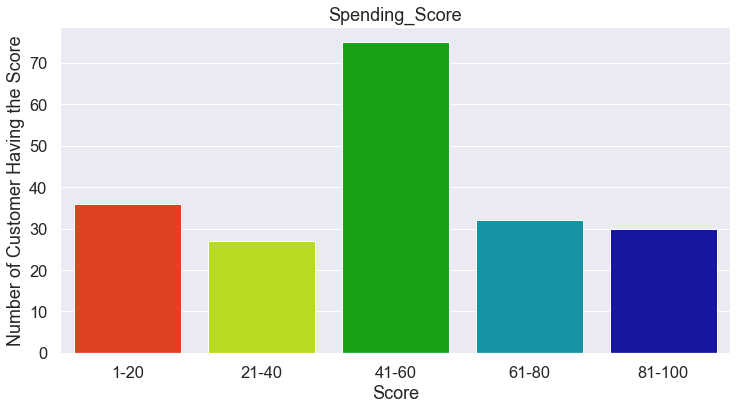

In [102]:
ss1_20=customer_data["Spending_Score"][(customer_data["Spending_Score"] >=1) & (customer_data["Spending_Score"] <=20)]
ss21_40=customer_data["Spending_Score"][(customer_data["Spending_Score"] >=21) & (customer_data["Spending_Score"] <=40)]
ss41_60=customer_data["Spending_Score"][(customer_data["Spending_Score"] >=41) & (customer_data["Spending_Score"] <=60)]
ss61_80=customer_data["Spending_Score"][(customer_data["Spending_Score"] >=61) & (customer_data["Spending_Score"] <=80)]
ss81_100=customer_data["Spending_Score"][(customer_data["Spending_Score"] >=81) & (customer_data["Spending_Score"] <=100)]

ssx = ["1-20","21-40","41-60","61-80","81-100"]
ssy = [len(ss1_20.values),len(ss21_40.values),len(ss41_60.values),len(ss61_80.values),len(ss81_100.values)]

plt.figure(figsize=(12,6))
sns.barplot(x=ssx,y=ssy,palette="nipy_spectral_r")
plt.title("Spending_Score")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()

<b>Visualising  the Number of Customer and Annual Income</b>


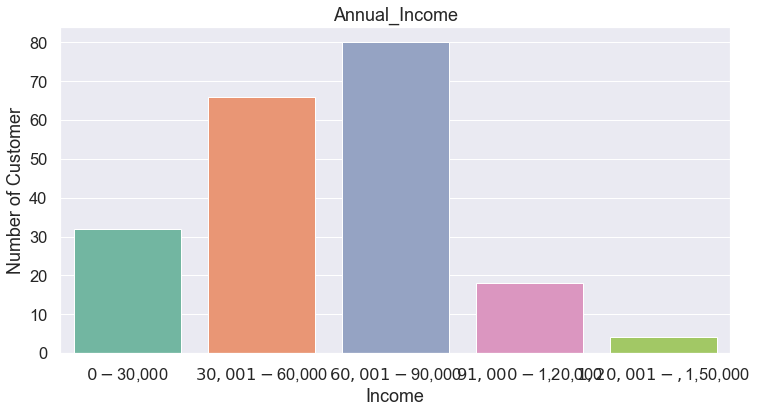

In [103]:
ai0_30=customer_data["Annual_Income"][(customer_data["Annual_Income"] >=0) & (customer_data["Annual_Income"] <=30)]
ai31_60=customer_data["Annual_Income"][(customer_data["Annual_Income"] >=31) & (customer_data["Annual_Income"] <=60)]
ai61_90=customer_data["Annual_Income"][(customer_data["Annual_Income"] >=61) & (customer_data["Annual_Income"] <=90)]
ai91_120=customer_data["Annual_Income"][(customer_data["Annual_Income"] >=91) & (customer_data["Annual_Income"] <=120)]
ai121_150=customer_data["Annual_Income"][(customer_data["Annual_Income"] >=121) & (customer_data["Annual_Income"] <=150)]

aix = ["$0-$30,000","$30,001-$60,000","$60,001-$90,000","$91,000-$1,20,000","$1,20,001-,$1,50,000"]
aiy = [len(ai0_30.values),len(ai31_60.values),len(ai61_90.values),len(ai91_120.values),len(ai121_150.values)]

plt.figure(figsize=(12,6))
sns.barplot(x=aix,y=aiy,palette="Set2")
plt.title("Annual_Income")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

<b>Density plot for Age and Annual income and Spending score</b>


C:\Users\Sohan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sohan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sohan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

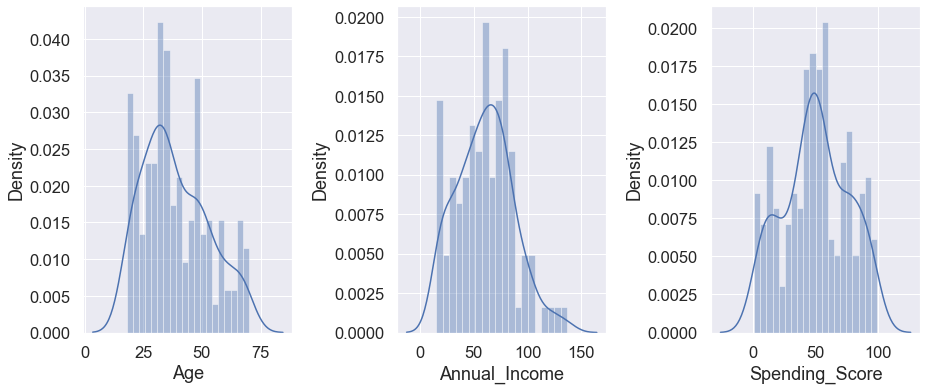

In [104]:
    plt.figure(1,figsize=(15,6))
    n=0
    for i in ["Age","Annual_Income","Spending_Score"]:
        n+=1
        plt.subplot(1,3,n)
        plt.subplots_adjust(hspace=0.5,wspace=0.5)
        sns.distplot(customer_data[i],bins=20)
        
    plt.show()



<AxesSubplot:>

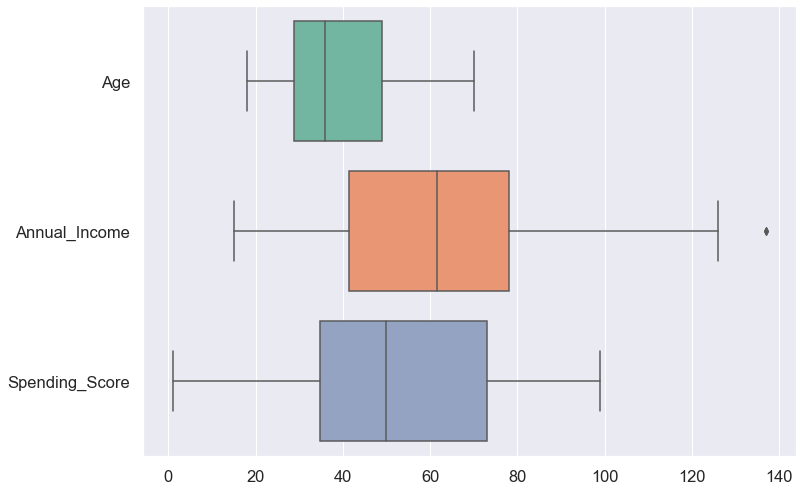

In [39]:
fig , ax =plt.subplots()
fig.set_size_inches(11.7,8.27)
sns.boxplot(data=customer_data, orient="h" , palette="Set2" , ax=ax)

<b>Visualizing Annual Income count value distribution on a histogram.</b>

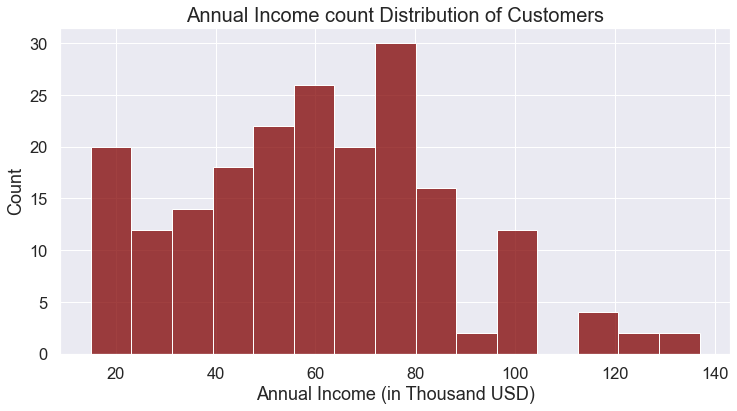

In [105]:
fig, ax = plt.subplots(figsize=(12,6))
sns.set(font_scale=1.5)
ax = sns.histplot(customer_data['Annual_Income'], bins=15, ax=ax, color=['maroon'])
ax.set_xlabel('Annual Income (in Thousand USD)')
plt.title('Annual Income count Distribution of Customers', fontsize = 20)
plt.show()

<b>Visualizing Spending Scores per Age on a scatterplot.</b>

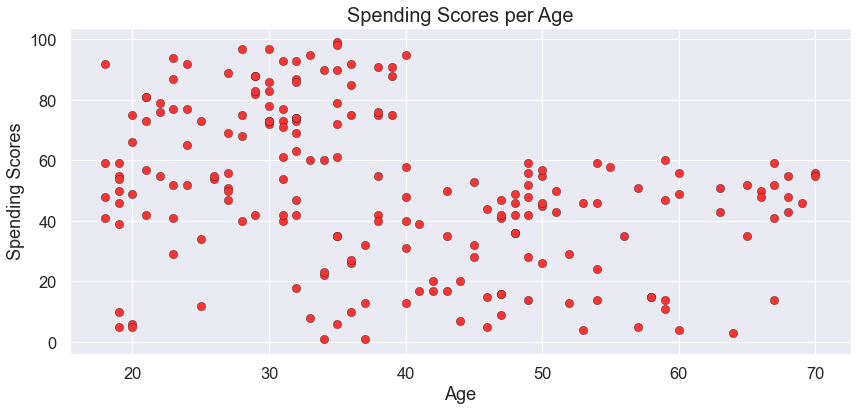

In [106]:
fig, ax = plt.subplots(figsize=(14,6))
sns.set(font_scale=1.5)
ax = sns.scatterplot(y=customer_data['Spending_Score'], x=customer_data['Age'], s=70, color='#f73434', edgecolor='black', linewidth=0.3)
ax.set_ylabel('Spending Scores')

plt.title('Spending Scores per Age', fontsize = 20)
plt.show()

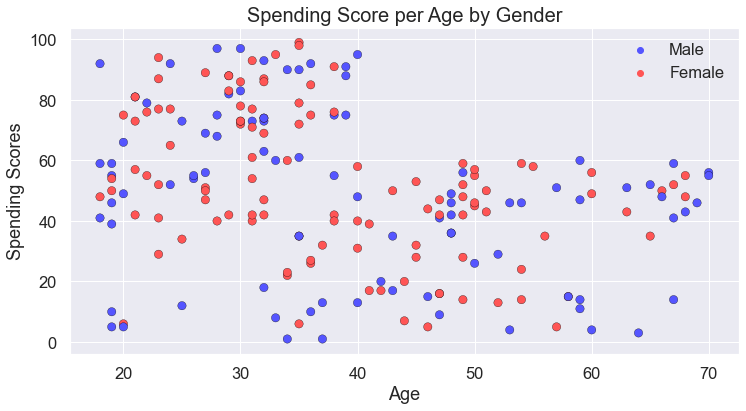

In [42]:
fig, ax = plt.subplots(figsize=(12,6))
sns.set(font_scale=1.5)
ax = sns.scatterplot(y=customer_data['Spending_Score'], x=customer_data['Age'], hue=customer_data['Gender'], palette='seismic', s=70,edgecolor='black', linewidth=0.3)
ax.set_ylabel('Spending Scores')
ax.legend(loc ='upper right')

plt.title('Spending Score per Age by Gender', fontsize = 20)
plt.show()

<b>Visualizing Annual Income per Age on a scatterplot.</b>

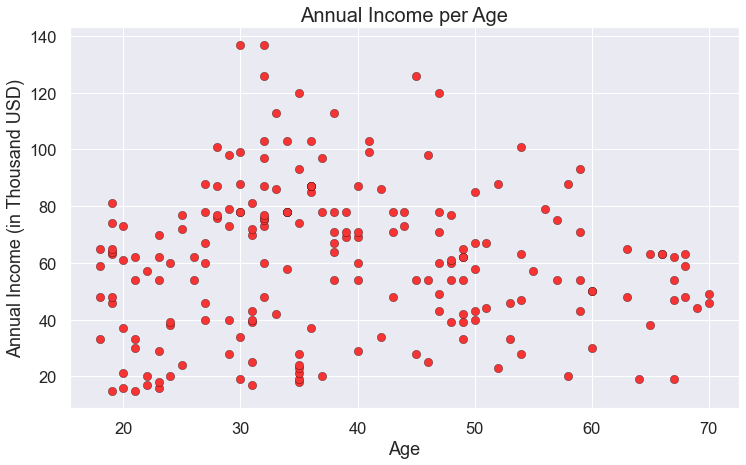

In [107]:
fig, ax = plt.subplots(figsize=(12,7))
sns.set(font_scale=1.5)
ax = sns.scatterplot(y=customer_data['Annual_Income'], x=customer_data['Age'], color='#f73434', s=70,edgecolor='black', linewidth=0.3)
ax.set_ylabel('Annual Income (in Thousand USD)')

plt.title('Annual Income per Age', fontsize = 20)
plt.show()

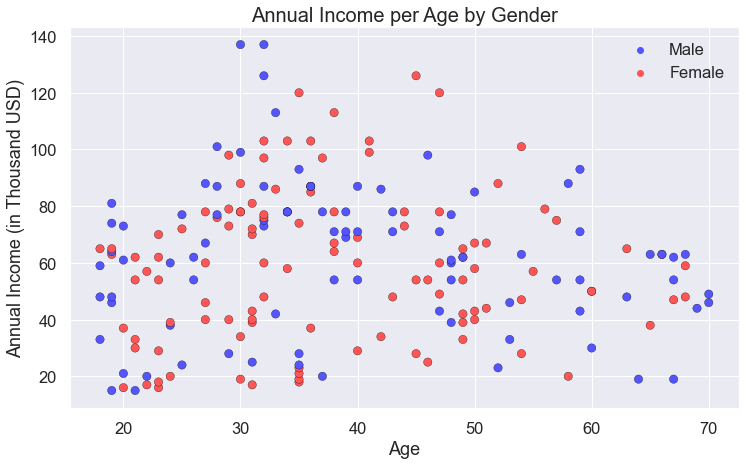

In [108]:
fig, ax = plt.subplots(figsize=(12,7))
sns.set(font_scale=1.5)
ax = sns.scatterplot(y=customer_data['Annual_Income'], x=customer_data['Age'], hue=customer_data['Gender'], palette='seismic', s=70,edgecolor='black', linewidth=0.3)
ax.set_ylabel('Annual Income (in Thousand USD)')
ax.legend(loc ='upper right')

plt.title('Annual Income per Age by Gender', fontsize = 20)
plt.show()

<font size= 5><b>K-Means Clustering</b></font>


K-means clustering is a clustering algorithm that aims to partition n observations into k clusters. Initialisation – K initial “means” (centroids) are generated at random Assignment – K clusters are created by associating each observation with the nearest centroid Update – The centroid of the clusters becomes the new mean, Assignment and Update are repeated iteratively until convergence The end result is that the sum of squared errors is minimised between points and their respective centroids. We will use KMeans Clustering. At first we will find the optimal clusters based on inertia and using elbow method. The distance between the centroids and the data points should be less.




In [109]:
clusteringdata = customer_data.iloc[:,[2,3]] #selecting particular row or cloumn od datset
clusteringdata.head()

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


visualize the data which we are going to use for the clustering.This will help us in further process 

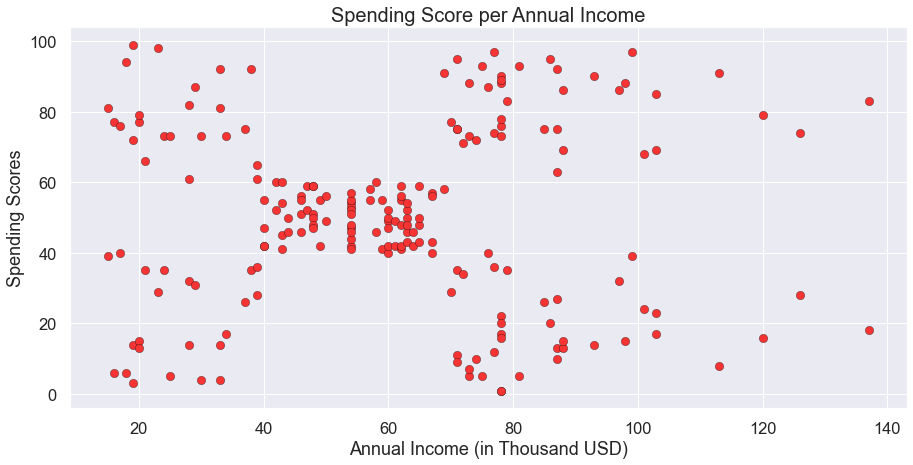

In [110]:
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.scatterplot(y=clusteringdata['Spending_Score'],x=clusteringdata['Annual_Income'], s=70, color='#f73434', edgecolor='black', linewidth=0.3)
ax.set_ylabel('Spending Scores')
ax.set_xlabel('Annual Income (in Thousand USD)')
plt.title('Spending Score per Annual Income', fontsize = 20)
plt.show()

In [111]:
x1=customer_data.loc[:,["Annual_Income","Spending_Score"]].values

In [112]:
    from sklearn.cluster import KMeans
    wcss=[]
    for i in range(1,11):
        km=KMeans(n_clusters=i)
        km.fit(x1)
        wcss.append(km.inertia_)

C:\Users\Sohan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<font size=5><b>Clustering</b></font>

The process of segregating objects into groups based on their respective characteristics is called clustering. In clusters, the features of objects in a group are similar to other objects present in the same group.


In [113]:
km1=KMeans(n_clusters=5)
km1.fit(x1)
y=km1.predict(x1)
customer_data["label"]=y
customer_data.head()


,Gender,Age,Annual_Income,Spending_Score,label
0,Male,19,15,39,2
1,Male,21,15,81,0
2,Female,20,16,6,2
3,Female,23,16,77,0
4,Female,31,17,40,2


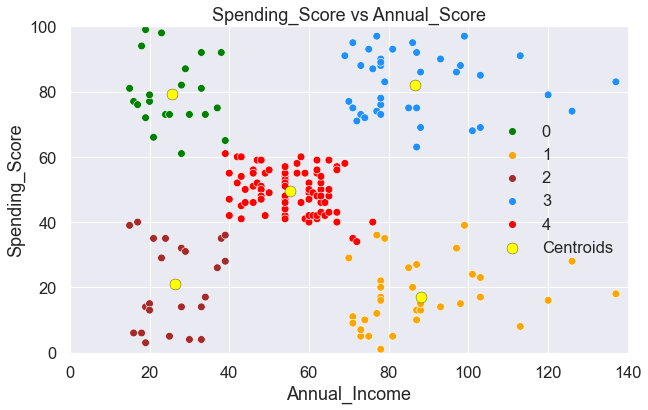

In [114]:
plt.figure(figsize=(10,6))
sns.scatterplot(x ='Annual_Income', y='Spending_Score', hue="label",palette=['green','orange','brown','dodgerblue','red'],
legend='full',data=customer_data, s=60)
plt.scatter(x=km1.cluster_centers_[:, 0], y=km1.cluster_centers_[:, 1], s = 120, c = 'yellow', label = 'Centroids',edgecolor='black', linewidth=0.3)
plt.legend(loc='right')
plt.xlim(0,140)
plt.ylim(0,100)
plt.xlabel('Annual_Income')
plt.ylabel('Spending_Score')
plt.title('Spending_Score vs Annual_Score')
plt.show()

<b>The Elbow Method</b>

The Elbow method runs k-means clustering on the dataset for a range of values for k (say from 1-10) and then for each value of k computes an average score for all clusters. By default, the distortion score is computed, the sum of square distances from each point to its assigned center.

When these overall metrics for each model are plotted, it is possible to visually determine the best value for k. If the line chart looks like an arm, then the “elbow” (the point of inflection on the curve) is the best value of k. The “arm” can be either up or down, but if there is a strong inflection point, it is a good indication that the underlying model fits best at that point.

We use the Elbow Method which uses Within Cluster Sum Of Squares (WCSS) against the the number of clusters (K Value) to figure out the optimal number of clusters value. WCSS measures sum of distances of observations from their cluster centroids which is given by the below formula.

C:\Users\Sohan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


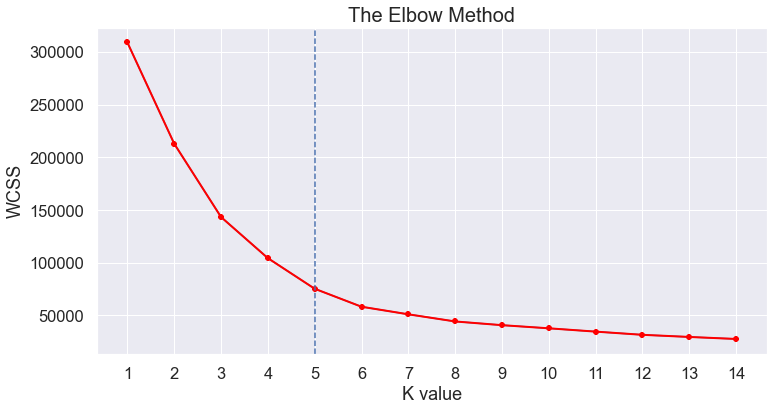

In [115]:
x4=customer_data.loc[:,["Age","Annual_Income","Spending_Score"]].values
wcss=[]
for i in range(1,15):
        km=KMeans(n_clusters=i)
        km.fit(x4)
        wcss.append(km.inertia_)
        
plt.figure(figsize=(12,6))
plt.plot(range(1,15),wcss)
plt.plot(range(1,15),wcss ,linewidth=2 ,color="red" ,marker="8")
plt.axvline(x=5, ls='--')
plt.xlabel("K value")
plt.xticks(np.arange(1,15,1))
plt.ylabel("WCSS")
plt.title('The Elbow Method', fontsize = 20)
plt.show()

In [116]:
km=KMeans(n_clusters=5)
y2=km.fit_predict(x4)
customer_data["label"]=y2
customer_data.head()

,Gender,Age,Annual_Income,Spending_Score,label
0,Male,19,15,39,3
1,Male,21,15,81,1
2,Female,20,16,6,3
3,Female,23,16,77,1
4,Female,31,17,40,3


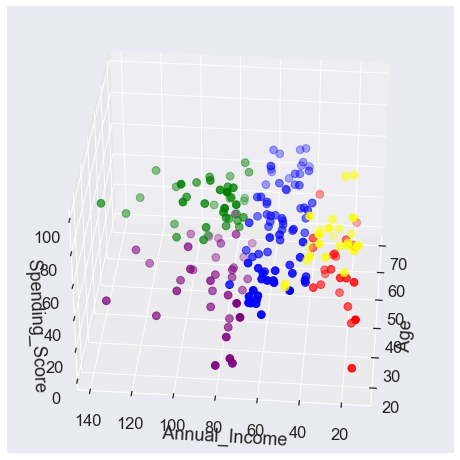

In [67]:
fig=plt.figure(figsize=(8,18))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(customer_data.Age[customer_data.label==0],customer_data["Annual_Income"][customer_data.label==0],customer_data
          ["Spending_Score"][customer_data.label==0],c='purple', s=60)
ax.scatter(customer_data.Age[customer_data.label==1],customer_data["Annual_Income"][customer_data.label==1],customer_data
          ["Spending_Score"][customer_data.label==1],c='red', s=60)
ax.scatter(customer_data.Age[customer_data.label==2],customer_data["Annual_Income"][customer_data.label==2],customer_data
          ["Spending_Score"][customer_data.label==2],c='blue', s=60)
ax.scatter(customer_data.Age[customer_data.label==3],customer_data["Annual_Income"][customer_data.label==3],customer_data
          ["Spending_Score"][customer_data.label==3],c='green', s=60)
ax.scatter(customer_data.Age[customer_data.label==4],customer_data["Annual_Income"][customer_data.label==4],customer_data
          ["Spending_Score"][customer_data.label==4],c='yellow', s=60)
ax.view_init(35,185)
plt.xlabel("  Age ")
plt.ylabel("   Annual_Income ")
ax.set_zlabel("  Spending_Score")
plt.show()
